In [60]:
import numpy as np
import pandas as pd

In [62]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')

In [63]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [64]:
df.shape

(100000, 9)

In [65]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [66]:
df['Churn'].unique()

array([0, 1], dtype=int64)

In [67]:
df['Location'].unique()

array(['Los Angeles', 'New York', 'Miami', 'Chicago', 'Houston'],
      dtype=object)

In [68]:
print(df['Age'].isnull().sum())
print(df['Gender'].isnull().sum())
print(df['Location'].isnull().sum())
print(df['Subscription_Length_Months'].isnull().sum())
print(df['Monthly_Bill'].isnull().sum())
print(df['Total_Usage_GB'].isnull().sum())
print(df['Churn'].isnull().sum())

0
0
0
0
0
0
0


In [69]:
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [70]:
df.groupby('Churn')['Churn'].agg('count')

Churn
0    50221
1    49779
Name: Churn, dtype: int64

In [71]:
df1 = df.copy()

In [72]:
df1.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


In [73]:
df1.drop(columns=['CustomerID', 'Name'], inplace=True)

In [74]:
df1.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [75]:
df1.groupby('Location')['Location'].agg('count')

Location
Chicago        19958
Houston        20157
Los Angeles    20041
Miami          20031
New York       19813
Name: Location, dtype: int64

In [76]:
df1.Monthly_Bill.describe()

count    100000.000000
mean         65.053197
std          20.230696
min          30.000000
25%          47.540000
50%          65.010000
75%          82.640000
max         100.000000
Name: Monthly_Bill, dtype: float64

In [77]:
df1.Subscription_Length_Months.describe()

count    100000.000000
mean         12.490100
std           6.926461
min           1.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          24.000000
Name: Subscription_Length_Months, dtype: float64

In [78]:
df1.Total_Usage_GB.describe()

count    100000.000000
mean        274.393650
std         130.463063
min          50.000000
25%         161.000000
50%         274.000000
75%         387.000000
max         500.000000
Name: Total_Usage_GB, dtype: float64

In [79]:
def more_than(no):    
    count = 0
    for i in range(len(df1['Total_Usage_GB'])):
        if df1['Total_Usage_GB'][i] >= no:
            count += 1
    return count

In [80]:
print(more_than(100))
print(more_than(200))
print(more_than(300))
print(more_than(400))
print(more_than(450))
print(more_than(500))

88756
66583
44337
22261
11375
245


In [81]:
import matplotlib 

In [82]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Count')

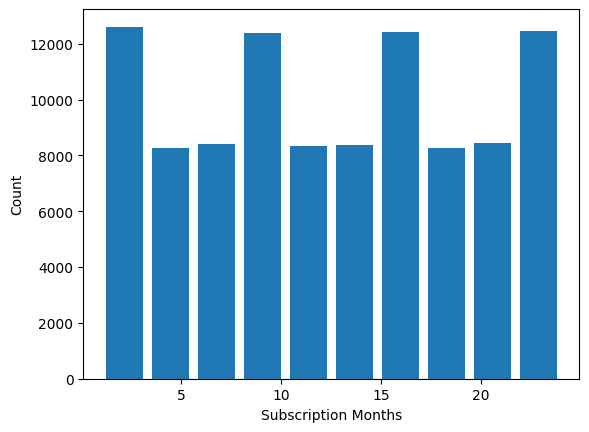

In [83]:
plt.hist(df1.Subscription_Length_Months, rwidth=0.8)
plt.xlabel("Subscription Months")
plt.ylabel("Count")

In [84]:
import seaborn as sns
# sns.pairplot(df1, hue='Churn')

In [85]:
df1.corr()

C:\Users\Priya\AppData\Local\Temp\ipykernel_18904\473017434.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df1.corr()


,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
Age,1.000000,0.003382,0.001110,0.001927,0.001559
Subscription_Length_Months,0.003382,1.000000,-0.005294,-0.002203,0.002328
Monthly_Bill,0.001110,-0.005294,1.000000,0.003187,-0.000211
Total_Usage_GB,0.001927,-0.002203,0.003187,1.000000,-0.002842
Churn,0.001559,0.002328,-0.000211,-0.002842,1.000000


C:\Users\Priya\AppData\Local\Temp\ipykernel_18904\621126171.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<AxesSubplot: >

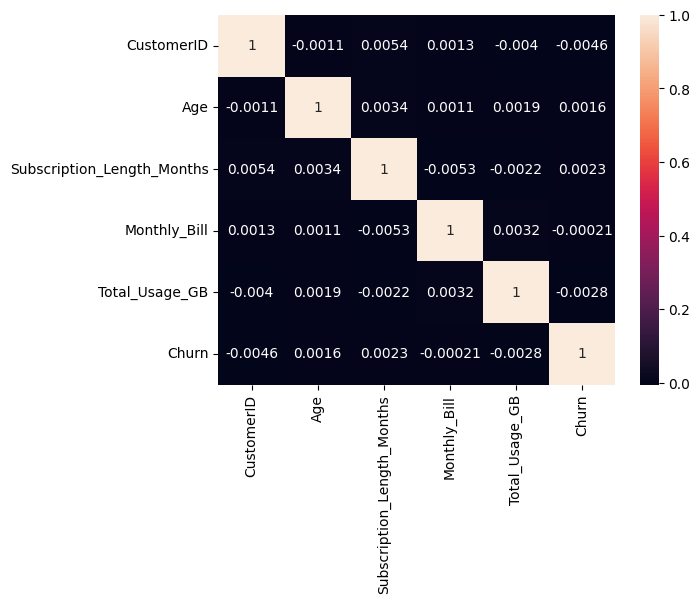

In [86]:
sns.heatmap(df.corr(), annot=True)

In [87]:
df2 = df1.copy()

In [88]:
df2 = pd.get_dummies(df2.Location)
df2.head()

,Chicago,Houston,Los Angeles,Miami,New York
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,1,0,0
3,0,0,0,1,0
4,0,0,0,1,0


In [89]:
df3 = pd.concat([df1, df2], axis = 'columns')
df3.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,63,Male,Los Angeles,17,73.36,236,0,0,0,1,0,0
1,62,Female,New York,1,48.76,172,0,0,0,0,0,1
2,24,Female,Los Angeles,5,85.47,460,0,0,0,1,0,0
3,36,Female,Miami,3,97.94,297,1,0,0,0,1,0
4,46,Female,Miami,19,58.14,266,0,0,0,0,1,0


In [90]:
df4 = df3.copy()
df4 = pd.get_dummies(df4.Gender)
df4.head()

,Female,Male
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0


In [91]:
df5 = pd.concat([df4, df3], axis = 'columns')

In [92]:
df5.head(10)

,Female,Male,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,0,1,63,Male,Los Angeles,17,73.36,236,0,0,0,1,0,0
1,1,0,62,Female,New York,1,48.76,172,0,0,0,0,0,1
2,1,0,24,Female,Los Angeles,5,85.47,460,0,0,0,1,0,0
3,1,0,36,Female,Miami,3,97.94,297,1,0,0,0,1,0
4,1,0,46,Female,Miami,19,58.14,266,0,0,0,0,1,0
5,0,1,67,Male,New York,15,82.65,456,1,0,0,0,0,1
6,1,0,30,Female,Chicago,3,73.79,269,0,1,0,0,0,0
7,1,0,67,Female,Miami,1,97.70,396,1,0,0,0,1,0
8,1,0,20,Female,Miami,10,42.45,150,1,0,0,0,1,0
9,1,0,53,Female,Los Angeles,12,64.49,383,1,0,0,1,0,0


In [93]:
df5 = df5.drop(['Location', 'Gender'], axis = 'columns')

In [94]:
df5.head(10)


,Female,Male,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
0,0,1,63,17,73.36,236,0,0,0,1,0,0
1,1,0,62,1,48.76,172,0,0,0,0,0,1
2,1,0,24,5,85.47,460,0,0,0,1,0,0
3,1,0,36,3,97.94,297,1,0,0,0,1,0
4,1,0,46,19,58.14,266,0,0,0,0,1,0
5,0,1,67,15,82.65,456,1,0,0,0,0,1
6,1,0,30,3,73.79,269,0,1,0,0,0,0
7,1,0,67,1,97.70,396,1,0,0,0,1,0
8,1,0,20,10,42.45,150,1,0,0,0,1,0
9,1,0,53,12,64.49,383,1,0,0,1,0,0


In [95]:
df5.shape

(100000, 12)

In [96]:
df5.corr()

,Female,Male,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn,Chicago,Houston,Los Angeles,Miami,New York
Female,1.000000,-1.000000,-0.000832,-0.000320,-0.002239,0.001385,-0.002121,0.000695,-0.006234,0.001360,0.001561,0.002645
Male,-1.000000,1.000000,0.000832,0.000320,0.002239,-0.001385,0.002121,-0.000695,0.006234,-0.001360,-0.001561,-0.002645
Age,-0.000832,0.000832,1.000000,0.003382,0.001110,0.001927,0.001559,0.006068,0.001795,-0.004971,0.001079,-0.003982
Subscription_Length_Months,-0.000320,0.000320,0.003382,1.000000,-0.005294,-0.002203,0.002328,0.002187,-0.001842,-0.001234,0.005508,-0.004630
Monthly_Bill,-0.002239,0.002239,0.001110,-0.005294,1.000000,0.003187,-0.000211,-0.005772,0.001856,0.003444,-0.002521,0.002992
Total_Usage_GB,0.001385,-0.001385,0.001927,-0.002203,0.003187,1.000000,-0.002842,-0.000442,-0.002137,-0.001562,0.001320,0.002837
Churn,-0.002121,0.002121,0.001559,0.002328,-0.000211,-0.002842,1.000000,0.000506,-0.006728,-0.004807,0.005235,0.005835
Chicago,0.000695,-0.000695,0.006068,0.002187,-0.005772,-0.000442,0.000506,1.000000,-0.250896,-0.249992,-0.249914,-0.248212
Houston,-0.006234,0.006234,0.001795,-0.001842,0.001856,-0.002137,-0.006728,-0.250896,1.000000,-0.251548,-0.251469,-0.249757
Los Angeles,0.001360,-0.001360,-0.004971,-0.001234,0.003444,-0.001562,-0.004807,-0.249992,-0.251548,1.000000,-0.250563,-0.248857


<AxesSubplot: >

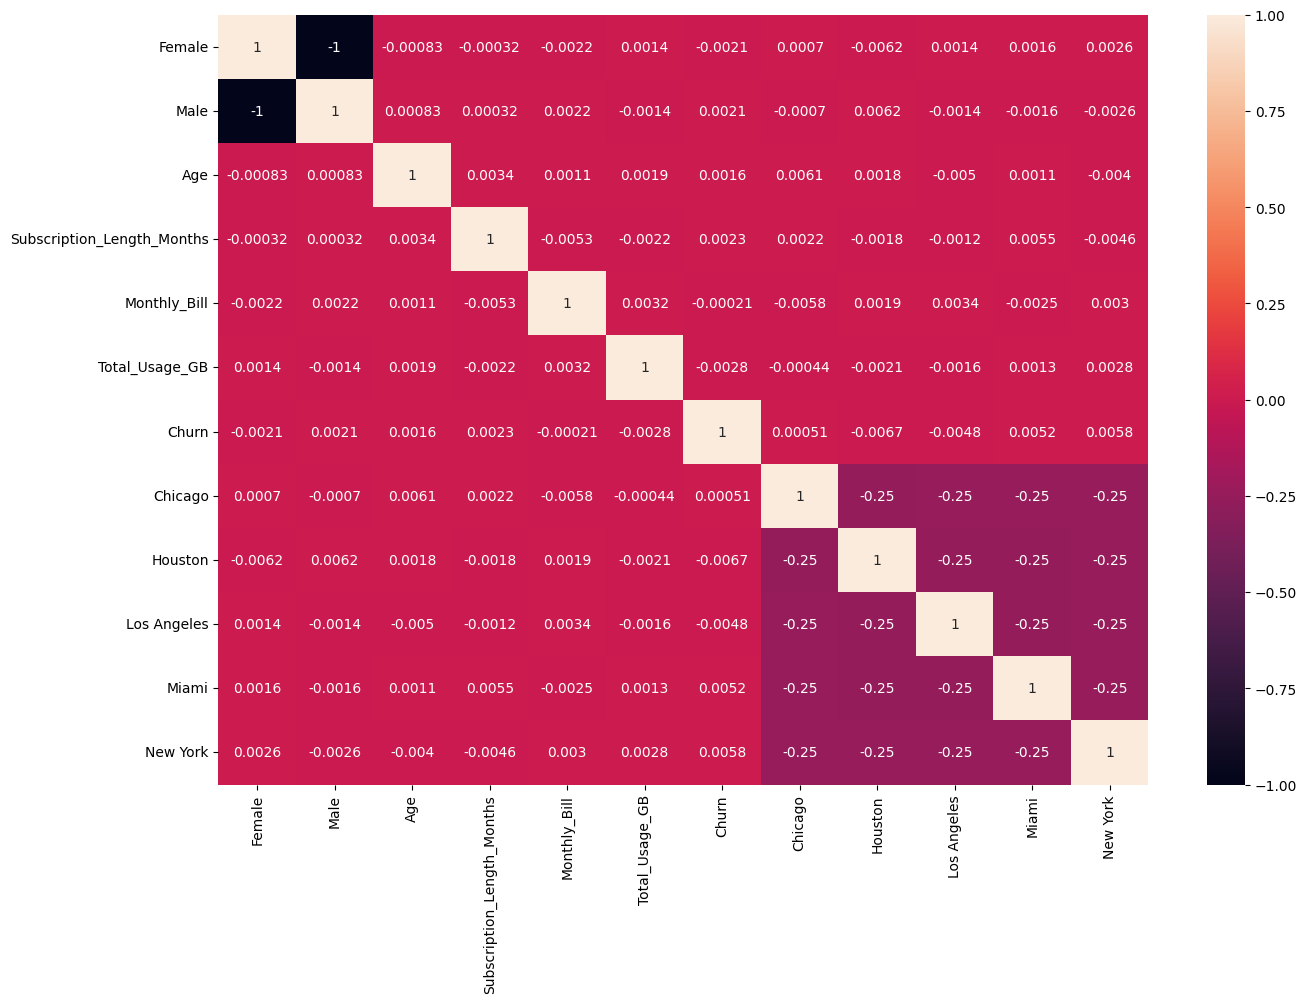

In [97]:
plt.subplots(figsize=(15,10))
sns.heatmap(df5.corr(), annot=True,)

<AxesSubplot: >

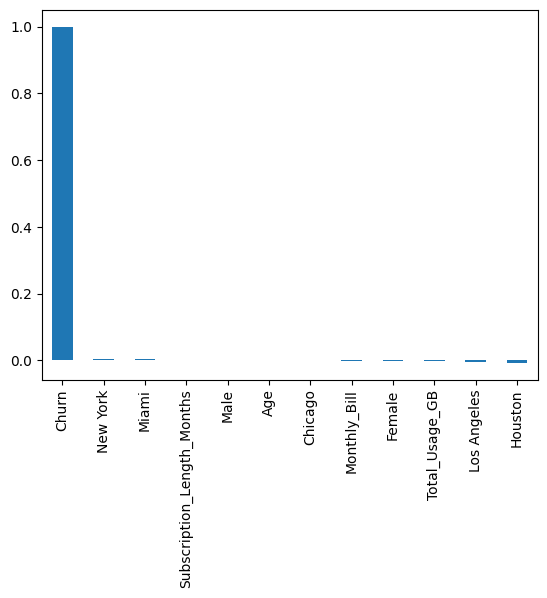

In [98]:
#plt.figure(figsize=(12,8))
df5.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

In [99]:
from sklearn.preprocessing import PolynomialFeatures

In [100]:
df6 = df5.copy()

In [101]:
poly = PolynomialFeatures(3)

In [102]:
poly.fit(df6)

PolynomialFeatures(degree=3)

In [103]:
y = df5.Churn

In [104]:
y.head(10)

0    0
1    0
2    0
3    1
4    0
5    1
6    0
7    1
8    1
9    1
Name: Churn, dtype: int64

In [105]:
y.shape

(100000,)

In [106]:
X = df5.drop('Churn', axis='columns')
X.head(10)

,Female,Male,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Chicago,Houston,Los Angeles,Miami,New York
0,0,1,63,17,73.36,236,0,0,1,0,0
1,1,0,62,1,48.76,172,0,0,0,0,1
2,1,0,24,5,85.47,460,0,0,1,0,0
3,1,0,36,3,97.94,297,0,0,0,1,0
4,1,0,46,19,58.14,266,0,0,0,1,0
5,0,1,67,15,82.65,456,0,0,0,0,1
6,1,0,30,3,73.79,269,1,0,0,0,0
7,1,0,67,1,97.70,396,0,0,0,1,0
8,1,0,20,10,42.45,150,0,0,0,1,0
9,1,0,53,12,64.49,383,0,0,1,0,0


In [107]:
X.shape

(100000, 11)

In [108]:
import sklearn

In [109]:
from sklearn.model_selection import train_test_split

In [110]:
X_train, X_1, y_train, y_1 =  train_test_split(X, y, test_size= 0.3, random_state= 10)
print(X_train.shape, y_train.shape)
print(X_1.shape, y_1.shape)

(70000, 11) (70000,)
(30000, 11) (30000,)


In [111]:
X_test, X_val, y_test, y_val = train_test_split(X_1, y_1, test_size= 0.5, random_state= 10)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)

(15000, 11) (15000,)
(15000, 11) (15000,)


### Model Selection

In [112]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [114]:
gnb.fit(X_train, y_train)
y_pred2 = gnb.predict(X_val)
print(accuracy_score(y_val, y_pred2))
print(confusion_matrix(y_val, y_pred2))
print(precision_score(y_val, y_pred2))

0.5032666666666666
[[3631 3884]
 [3567 3918]]
0.502178928479877


In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [116]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbc = GradientBoostingClassifier(n_estimators=50, random_state=2)
knc = KNeighborsClassifier()
xgb = XGBClassifier()

In [117]:
models = {
    'LogisticRegression' : lrc,
    'SVC' : svc,
    'MultinomialNB' : mnb,
    'DecisionTreeClassifier' : dtc,
    'RandomForestClassifier': rfc,
    'AdaBoostClassifier' : abc,
    'BaggingClassifier' : bc,
    'ExtraTreesClassifier' : etc,
    'GradientBoostingClassifier' : gbc,
    'KNeighborsClassifier' : knc,
    'XGBClassifier' : xgb
}

In [118]:
def train_classifier(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)
    return accuracy, precision, cm

In [119]:
acc, pre, cm = train_classifier(lrc, X_train, y_train, X_val, y_val)
print('Accuracy: ', acc)
print('Precision: ', pre)
print('Confusion Matrix: ')
print(cm)

Accuracy:  0.5012
Precision:  0.500225056264066
Confusion Matrix: 
[[4184 3331]
 [4151 3334]]
